In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
from collections import Counter
from collections import Counter
import matplotlib.pyplot as plt
import os
import math
import sys
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

import zipfile

 # unzip file
# zy = zipfile.ZipFile('/content/sample_data/dunnhumby - The Complete Journey CSV-20221028T212450Z-001.zip')
# ret = zy.extractall()


# ![Screenshot%202022-10-27%20212543.png](attachment:Screenshot%202022-10-27%20212543.png)

In [2]:
!unzip ./data/TheCompleteJourney.zip

Archive:  ./data/TheCompleteJourney.zip
replace dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/campaign_desc.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:


path = './dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/'

product = pd.read_csv(path + 'product.csv')
transaction = pd.read_csv(path + 'transaction_data.csv')
campaign_desc = pd.read_csv(path + 'transaction_data.csv')
hh_demo = pd.read_csv(path + 'hh_demographic.csv')

##According to the  methodology of Wan, Mengting[1], I selected these three datasets.
# [1]Wan, Mengting, et al. "Modeling consumer preferences and price sensitivities from large-scale grocery shopping 
#    transaction logs." Proceedings of the 26th International Conference on World Wide Web. 2017.

In [4]:
campaign_desc.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1.0,1004906.0,1.0,1.39,364.0,-0.60,1631.0,1.0,0.0,0.0
1,2375,26984851472,1.0,1033142.0,1.0,0.82,364.0,0.00,1631.0,1.0,0.0,0.0
2,2375,26984851472,1.0,1036325.0,1.0,0.99,364.0,-0.30,1631.0,1.0,0.0,0.0
3,2375,26984851472,1.0,1082185.0,1.0,1.21,364.0,0.00,1631.0,1.0,0.0,0.0
4,2375,26984851472,1.0,8160430.0,1.0,1.50,364.0,-0.39,1631.0,1.0,0.0,0.0


In [5]:


campaign_desc.nunique()

household_key          2497
BASKET_ID            127268
DAY                     361
PRODUCT_ID            64668
QUANTITY               6844
SALES_VALUE            4454
STORE_ID                441
RETAIL_DISC            1926
TRANS_TIME             1436
WEEK_NO                  52
COUPON_DISC             270
COUPON_MATCH_DISC        56
dtype: int64

In [6]:


product.head()      

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [7]:


product['PRODUCT_ID'].nunique()


# Actually I'm so confused with product_id which is so unique 😂

92353

In [8]:


product.shape

(92353, 7)

In [9]:


product = product[['COMMODITY_DESC', 'PRODUCT_ID']] 


# ![image.png](attachment:image.png)
# Transactional data contains purchase history of each household. 

In [10]:


transaction.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1.0,1004906.0,1.0,1.39,364.0,-0.60,1631.0,1.0,0.0,0.0
1,2375,26984851472,1.0,1033142.0,1.0,0.82,364.0,0.00,1631.0,1.0,0.0,0.0
2,2375,26984851472,1.0,1036325.0,1.0,0.99,364.0,-0.30,1631.0,1.0,0.0,0.0
3,2375,26984851472,1.0,1082185.0,1.0,1.21,364.0,0.00,1631.0,1.0,0.0,0.0
4,2375,26984851472,1.0,8160430.0,1.0,1.50,364.0,-0.39,1631.0,1.0,0.0,0.0


In [11]:


transaction.shape

(1176883, 12)

In [12]:


transaction['STORE_ID'].nunique()

441

In [13]:


grouped_sum = transaction.groupby("household_key").sum()
grouped_sum.head()

,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
household_key,,,,,,,,,,,
1,23140325990676,164933.0,2.096160e+09,905.0,1914.09,614405.0,-347.85,1112209.0,24108.0,-29.50,-10.0
2,10622705437011,73672.0,9.476910e+08,423.0,990.19,158690.0,-183.23,653294.0,10771.0,-6.00,0.0
3,19606624014828,145162.0,1.488790e+09,1189.0,2014.03,260249.0,-534.07,1098493.0,21102.0,-61.19,-19.8
4,7514694511809,53668.0,6.111274e+08,302.0,980.21,74735.0,-97.44,400485.0,7888.0,-2.50,0.0
5,4634559230533,28811.0,4.305797e+08,175.0,505.59,58718.0,-90.29,290663.0,4261.0,0.00,0.0


In [14]:


transaction['STORE_ID'].nunique()

441

In [15]:


sales = transaction.groupby("STORE_ID").sum()["SALES_VALUE"].sort_values(ascending=False)
sales = pd.DataFrame(list(zip(sales.index,sales)),columns=["Store ID","Total Sales (USD)"])

sales.head()

,Store ID,Total Sales (USD)
0,367.0,126190.06
1,406.0,98987.75
2,361.0,83342.26
3,381.0,66901.80
4,375.0,66406.89


In [16]:


sales.describe()


# Here I deleted small samples/shop whose transaction == 0 

,Store ID,Total Sales (USD)
count,441.000000,441.000000
mean,2791.124717,8141.946327
std,6001.968936,16688.165044
min,1.000000,0.000000
25%,406.000000,24.710000
50%,984.000000,98.540000
75%,3009.000000,2762.570000
max,33923.000000,126190.060000


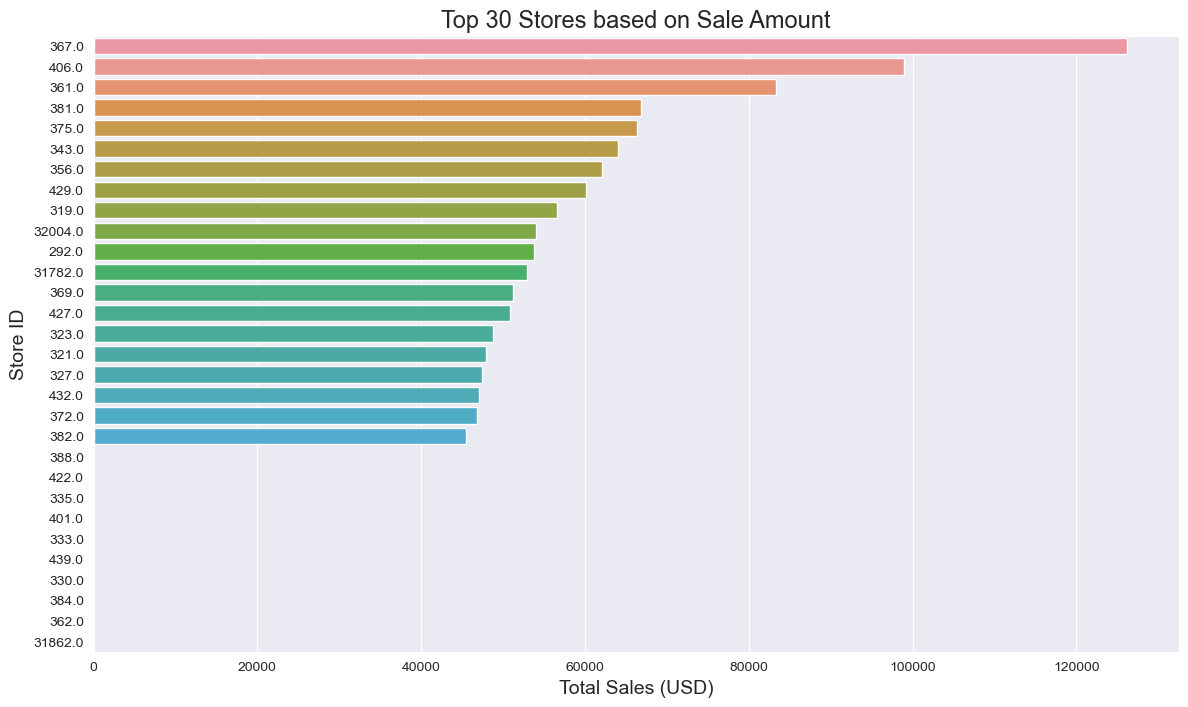

In [17]:


fig_store = plt.figure(figsize=(14,8))
sns.barplot(y="Store ID",x="Total Sales (USD)",data = sales[:20],order=sales[:30]["Store ID"],orient="h")
plt.title('Top 30 Stores based on Sale Amount', fontsize=17)
plt.xlabel('Total Sales (USD)', fontsize=14)
plt.ylabel('Store ID', fontsize=14)
plt.show()

In [18]:


purc_per_cust = transaction.groupby("household_key").sum()["SALES_VALUE"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["household_key","Total Purchase (USD)"])

In [19]:


purc_per_cust.describe()

,household_key,Total Purchase (USD)
count,2497.000000,2497.000000
mean,1249.643572,1437.964890
std,721.765411,1556.720505
min,1.000000,1.000000
25%,625.000000,398.140000
50%,1249.000000,938.950000
75%,1874.000000,1914.090000
max,2500.000000,13137.440000


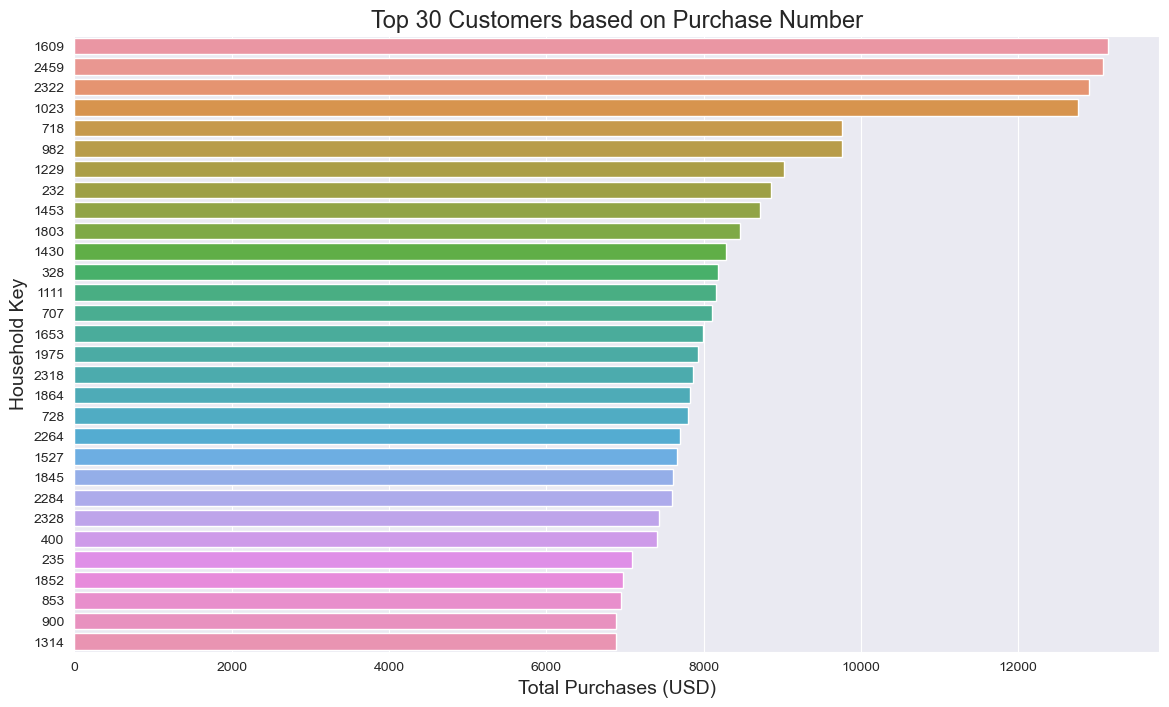

In [20]:


fig_store = plt.figure(figsize=(14,8))
sns.barplot(y="household_key",x="Total Purchase (USD)",data = purc_per_cust[:30],order=purc_per_cust[:30]["household_key"],orient="h")
plt.title('Top 30 Customers based on Purchase Number', fontsize=17)
plt.xlabel('Total Purchases (USD)', fontsize=14)
plt.ylabel('Household Key', fontsize=14)
plt.show()

In [21]:


hh_demo.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [22]:


def pie_categorical(data):
    #function to plot the histogram of categorical variables in pie graph
    features = data.columns
    #plot pie charts of categorical variables
    fig_pie_cat = plt.figure(figsize=(15,15))
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_pie_cat.add_subplot(rows,cols,count)
        data[i].value_counts().plot(kind="pie",autopct="%.1f%%",ax=ax)
        plt.ylabel("")
        plt.title(i,fontweight="bold",fontsize=8)
        count += 1

def hist_numeric(data):
    #function to plot the histogram of numeric variables
    features = data.columns
    fig_hists = plt.figure(figsize=(15,15))
    fig_hists.subplots_adjust(hspace=0.5,wspace=0.5)
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_hists.add_subplot(rows,cols,count)
        data[i].plot(kind="hist",alpha=.5,bins=25,edgecolor="navy",legend=False,ax=ax)
        ax.set_xlabel("")
        ax.set_title(i,fontweight="bold",fontsize=10)
        count += 1

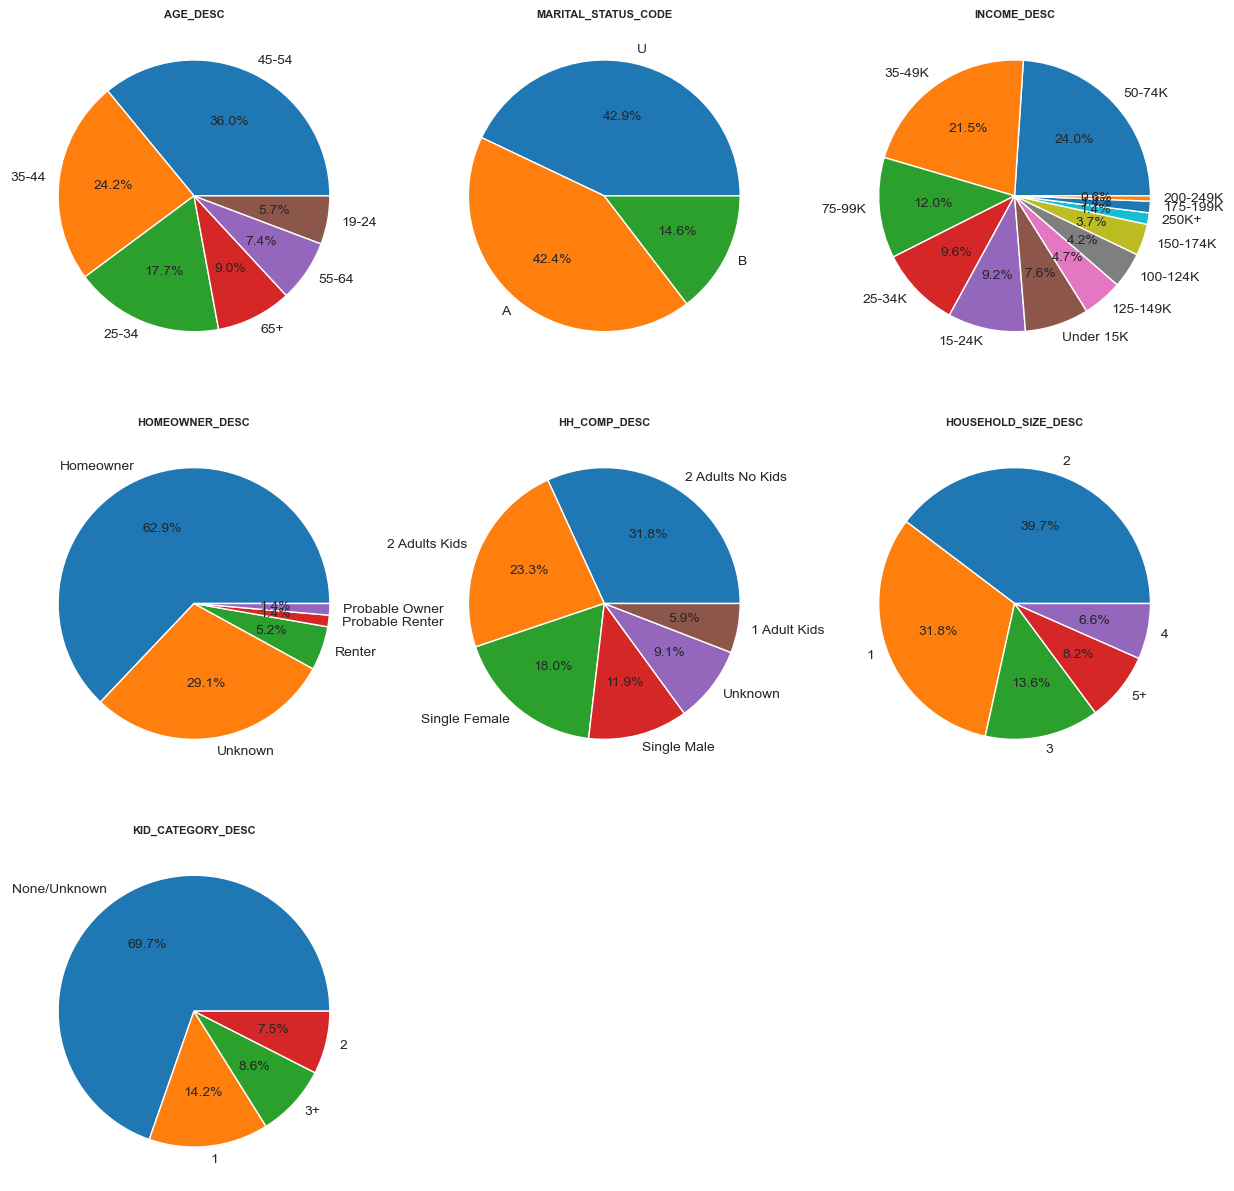

In [23]:


pie_categorical(hh_demo.drop("household_key",axis=1))